In [1]:
%pylab inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_26495/2892611477.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [2]:
font = {'size'   : 14}
pylab.rc('figure',figsize = (8, 6))
pylab.rc('font',**font)

# Imports
Right now I do not have the database scripts in a python module. So drop this notebook in the same folder as my database.py, and make sure you have pymongo installed

In [3]:
import database
from  datetime import datetime, timezone,timedelta

## Database query
Here I query the database for ~30 hrs of thermometry from 2019. The sd and ed variables can be changed to meet your requirements (ed can be in the future if you want to get the newest data)

the mongostring argument is optional, I will send a mongostring file to you and if you put it in this folder with the filename "mongostring" you can omit this argument. (I have several of these files that need testing from time to time)

In [27]:
tz = timezone(timedelta(hours=0))
sd = datetime(2019,11,24,hour=21,minute=10,tzinfo=tz)
ed = datetime(2019,11,25,hour=21,minute=18,tzinfo=tz)
t = database.EasyThermometry(0,start_date=sd,end_date=ed,mongostring="mongostring_router_test")

## Read data
The easythermometry object has a dictionary member variable that contains the data. The keys to this dictionary are the categories of sensor, e.g. "GRT", "4WIRE", "Current". That returns a list of all sensors in that category. For example, the below makes a numpy array out of the data for GRT6.

In [28]:
array_temp = np.array(t.sensors['GRT'][6])
array_temp

array([[1.57464780e+09, 1.29993087e-01],
       [1.57464780e+09, 1.29993397e-01],
       [1.57464780e+09, 1.29993769e-01],
       ...,
       [1.57473468e+09, 1.30009167e-01],
       [1.57473468e+09, 1.30005665e-01],
       [1.57473468e+09, 1.30003617e-01]])

## Plot data
The data are always returned as a list of pairs, unix time and temperature value in Kelvin. So plotting is relatively easy:

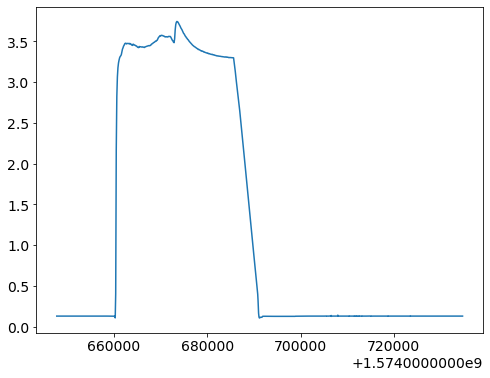

In [30]:
plot(array_temp[:,0],array_temp[:,1])

This is a little ugly, so I usually clean it up with the following:

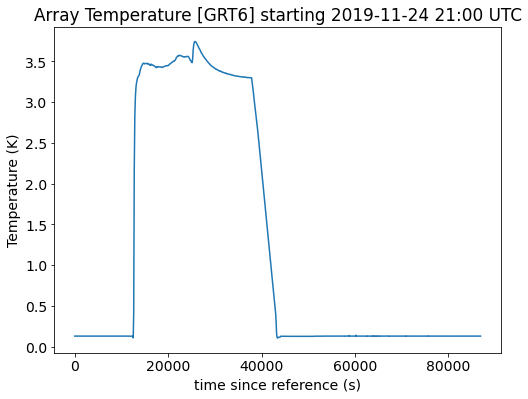

In [32]:
plot(array_temp[:,0]-array_temp[0,0],array_temp[:,1])
title("Array Temperature [GRT6] starting 2019-11-24 21:00 UTC")
xlabel("time since reference (s)")
ylabel("Temperature (K)");